# Multi-Undersample

## Imports

In [10]:
# !pip install -U imbalanced-learn
# !pip install xgboost

# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.data_fetching as data_fetching
import Components.MultiSample as MultiSample

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(data_fetching)
importlib.reload(MultiSample)

<module 'Components.MultiSample' from '../Components/MultiSample.py'>

## Data Preprocessing

### Data Import

In [3]:
X, y = data_fetching.get_train_data()
y = np.ravel(y)
x_test = data_fetching.get_test_data()

## Model

### Pipeline Setup

In [4]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification', MultiSample.MultiDownSyndrome(verbose=True))])

### CV Score Test

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X,y)

multi = MultiSample.MultiDownSyndrome(clf_type='equal',max_depth=5,learning_rate=0.1,n_estimators=200,n_clf=30,verbose=True)
cv_score = cross_val_score(multi, X, y, cv=10, scoring='balanced_accuracy')
print(cv_score)
print(np.mean(cv_score))

Training  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Predicting with  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Training  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Predicting with  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Training  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Predicting with  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Training  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Predicting with  30 estimat

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X,y)

x_train,x_test_2,y_train,y_test = train_test_split(X,y)
multi.fit(x_train,y_train)
y_pred = multi.predict(x_test_2)
confusion_matrix(y_test, y_pred)
balanced_accuracy_score(y_test, y_pred)

Training  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,
Predicting with  30 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,


array([[ 92,   7,  49],
       [182, 625, 106],
       [ 22,   8, 109]])

### GridSearch

In [ ]:
clf_type = ['xgb']
n_clf = [10]
max_depth = [3,5,7]
learning_rate = [0.1,0.05]
n_estimators_model = [100,200]

parameters = parameters = dict(classification__n_clf=n_clf,
                                  classification__clf_type=clf_type,
                                  classification__max_depth=max_depth,
                                  classification__learning_rate=learning_rate,
                                  classification__n_estimators=n_estimators_model)

clf = GridSearchCV(pipe, parameters, cv=10, n_jobs=-1, verbose=10, scoring='balanced_accuracy')
clf.fit(X, y)

# View The Best Parameters
print(clf.best_params_)
print(clf.best_score_)

# depth = 5
# rate = 0.1
# est = 200
# best_score = 0.68 something something

In [ ]:
results = pd.DataFrame(clf.cv_results_)
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth",200) 
results[["params","mean_test_score"]] #.query('mean_test_score >= 0.69')

## Final prediction

Training  50 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,
Predicting with  50 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,
Train Score: 0.7574074074074074
Predicting with  50 estimators
1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,


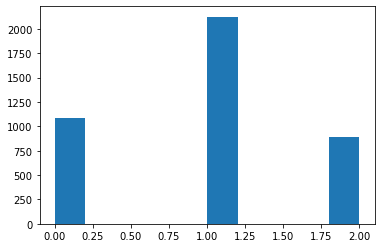

In [19]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification', MultiSample.MultiDownSyndrome(verbose=True,clf_type='svc',n_clf=50))])
pipe.fit(X,y)
print("Train Score:", balanced_accuracy_score(y, pipe.predict(X)))

y_pred = pipe.predict(x_test)
plt.hist(y_pred)

y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])


In [21]:
y_pred_pd.to_csv('../../Predictions/SVC_MultiDown.csv', index_label='id')